<h3>1. Import module yang dibutuhkan</h3>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h3>2. Load Dataset</h3>

In [2]:
imagePaths = 'dataset\\daun\\'
label_list = ['blimbing', 'jeruk','kemangi']
data = []
labels = []

In [3]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)
        labels.append(label)

In [4]:
np.array(data).shape

(150, 3072)

<h3>3. Data Preprocessing</h3>

In [5]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [6]:
print(labels)

['blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing'
 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing'
 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing'
 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing'
 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing'
 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing'
 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing'
 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing' 'blimbing'
 'blimbing' 'blimbing' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk'
 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk'
 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk'
 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk'
 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk'
 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'jeruk' 'kemangi'
 'kemangi' 'kemangi' 'kema

In [7]:
# ubah nilai dari labels menjadi binary
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

<h3>4. Split Dataset</h3>

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (120, 3072)
Ukuran data test = (30, 3072)


<h3>5. Build ANN Architecture</h3>

In [10]:
# buat ANN dengan arsitektur input layer (3072) - hidden layer (512) - hidden layer (1024) - output layer (3)
model = Sequential()
model.add(Dense(512, input_shape=(3072,), activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(len(label_list), activation="softmax"))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3075      
Total params: 2,101,763
Trainable params: 2,101,763
Non-trainable params: 0
_________________________________________________________________


In [11]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [12]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'categorical_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [13]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
4/4 [==============================] - 4s 110ms/step - loss: 1.9294 - accuracy: 0.2500 - val_loss: 1.2883 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 1.0574 - accuracy: 0.4250 - val_loss: 0.9428 - val_accuracy: 0.5667
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.9996 - accuracy: 0.4000 - val_loss: 0.9114 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.8318 - accuracy: 0.6667 - val_loss: 0.8463 - val_accuracy: 0.6333
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 0.8588 - accuracy: 0.5833 - val_loss: 0.7361 - val_accuracy: 0.9000
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 0.7906 - accuracy: 0.6667 - val_loss: 0.9621 - val_accuracy: 0.3667
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.7949 - accuracy: 0.6583 - val_loss: 0.7670 - val_accuracy: 0.6000
Epoch 8/100
4/4 [==

Epoch 59/100
4/4 [==============================] - 0s 21ms/step - loss: 0.3733 - accuracy: 0.7833 - val_loss: 0.4162 - val_accuracy: 0.7000
Epoch 60/100
4/4 [==============================] - 0s 23ms/step - loss: 0.2880 - accuracy: 0.8667 - val_loss: 0.2618 - val_accuracy: 0.9333
Epoch 61/100
4/4 [==============================] - 0s 20ms/step - loss: 0.2441 - accuracy: 0.9333 - val_loss: 0.2447 - val_accuracy: 0.9333
Epoch 62/100
4/4 [==============================] - 0s 20ms/step - loss: 0.2365 - accuracy: 0.9417 - val_loss: 0.2945 - val_accuracy: 0.9333
Epoch 63/100
4/4 [==============================] - 0s 21ms/step - loss: 0.2921 - accuracy: 0.8917 - val_loss: 0.5124 - val_accuracy: 0.6667
Epoch 64/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5050 - accuracy: 0.6833 - val_loss: 0.2730 - val_accuracy: 0.9333
Epoch 65/100
4/4 [==============================] - 0s 22ms/step - loss: 0.2886 - accuracy: 0.9000 - val_loss: 0.3196 - val_accuracy: 0.9000
Epoch 66/100


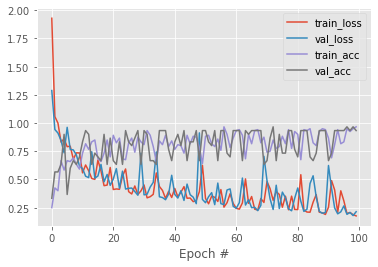

In [14]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [15]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=label_list))

              precision    recall  f1-score   support

    blimbing       1.00      0.80      0.89        10
       jeruk       1.00      1.00      1.00         9
     kemangi       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



In [18]:
# uji model menggunakan image lain
queryPath = imagePaths+'007.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32)).flatten()
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
i = q_pred.argmax(axis=1)[0]
label = lb.classes_[i]

In [ ]:
text = "{}: {:.2f}%".format(label, q_pred[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose